# Deals - GradientBoostingRegressor
## Import and Load the Data

In [1]:
import warnings
import os
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from bidi import algorithm as bidialg

%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
except Exception:
    print("Seems we have a problem")

In [3]:
print("File Columns are:", df.columns)
print("Number of rows:", df.shape[0])

File Columns are: Index(['sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'final_price', 'sale_day_year',
       'sale_day_month', 'street', 'street_number', 'neighborhood',
       'address_area', 'address_neighborhood'],
      dtype='object')
Number of rows: 416538


## Choosing the features

In [4]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

### Remove Outliers method
Quantile Explanation: https://www.youtube.com/watch?v=IFKQLDmRK0Y
![image](https://upload.wikimedia.org/wikipedia/commons/5/5e/Iqr_with_quantile.png)

In [5]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    # define Quantiles ranges
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3 - q1 # Interquartile range
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


## Retrieve Cities Names


In [6]:

_cities = df['city'].unique()

cities = []
for city in _cities:
    _df = df.loc[(df['city'] == city)]    
    if len(_df.index) > 250:
        cities.append(city)

test_size = 0.3

cities = {city: {"processor": None, "algo": None, "mse": None, "fig": None} for city in cities if '/' not in city}

print("Total number of cities is:", len(cities))


Total number of cities is: 78


## Running the Algo

חיפה
R2 Score: 0.8468
MSE sqrt: 200728.9780


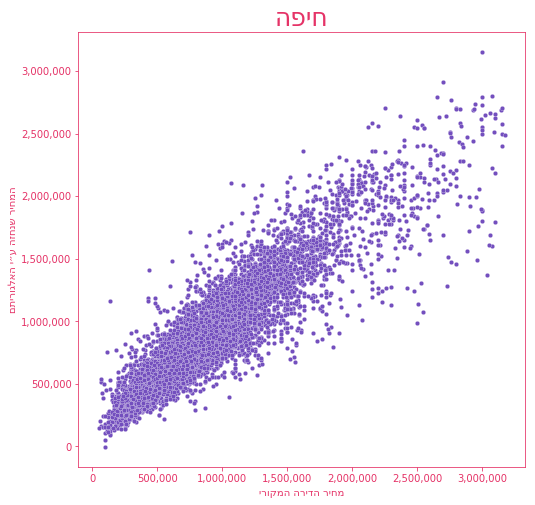

תל אביב יפו
R2 Score: 0.7620
MSE sqrt: 564466.0428


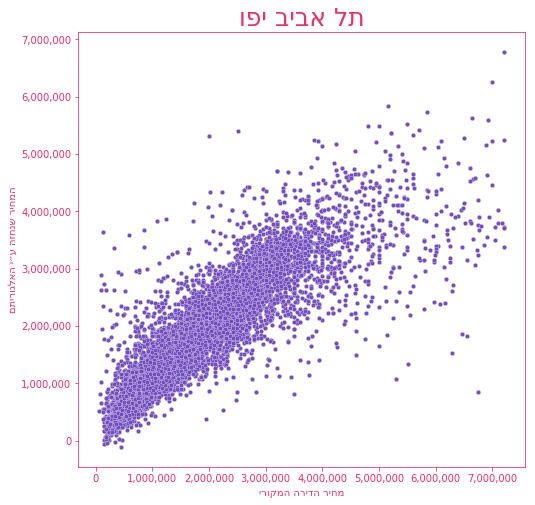

הרצליה
R2 Score: 0.7725
MSE sqrt: 447120.6337


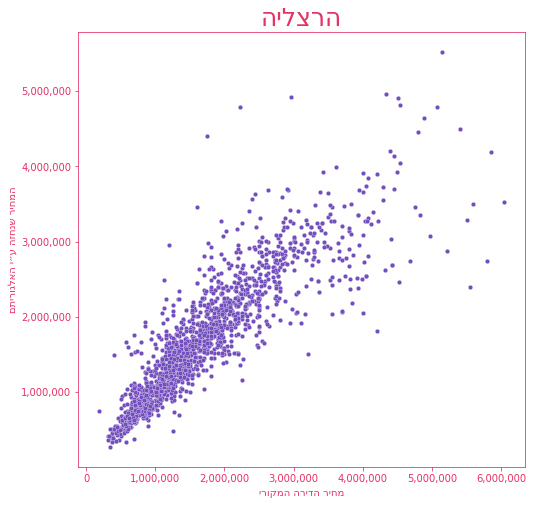

ירושלים
R2 Score: 0.8092
MSE sqrt: 307202.1839


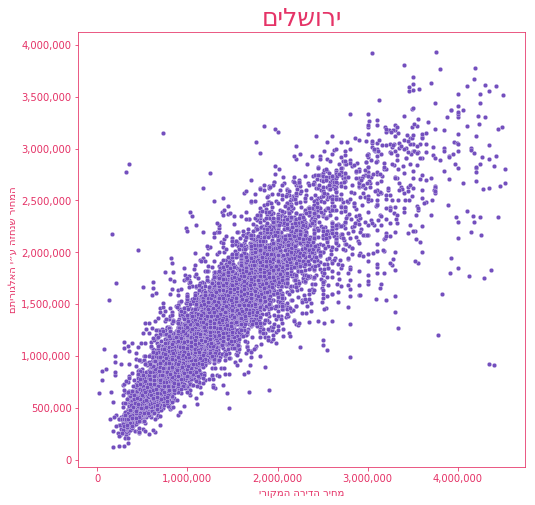

באר יעקב
R2 Score: 0.8711
MSE sqrt: 163786.6754


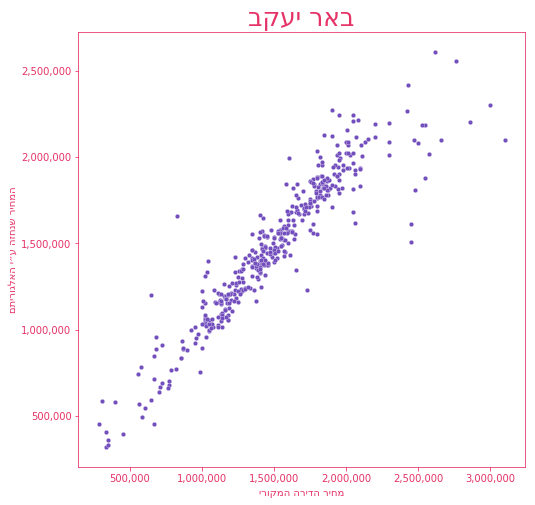

רחובות
R2 Score: 0.8877
MSE sqrt: 166493.7121


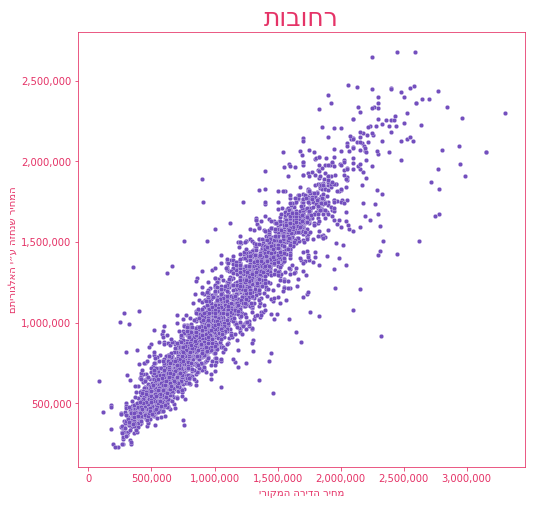

רמת גן
R2 Score: 0.8843
MSE sqrt: 235570.8656


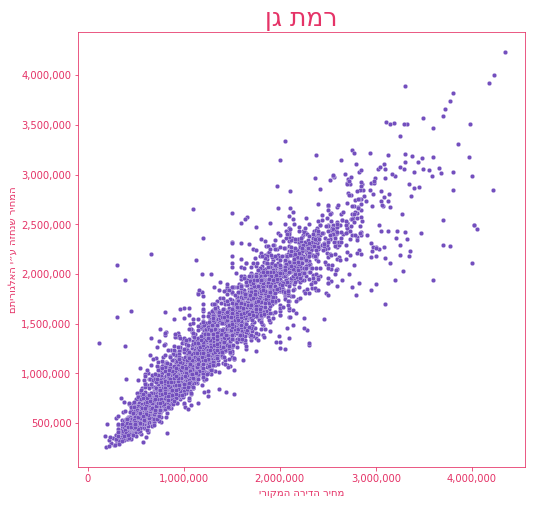

ראשון לציון
R2 Score: 0.9145
MSE sqrt: 164539.6381


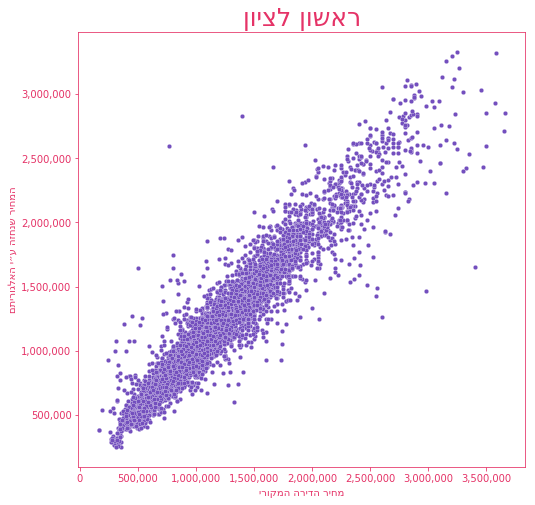

בת ים
R2 Score: 0.8790
MSE sqrt: 197392.0966


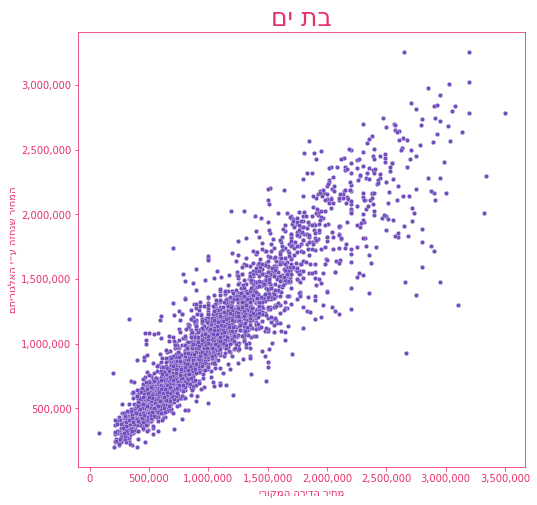

רמת השרון
R2 Score: 0.8643
MSE sqrt: 373246.6738


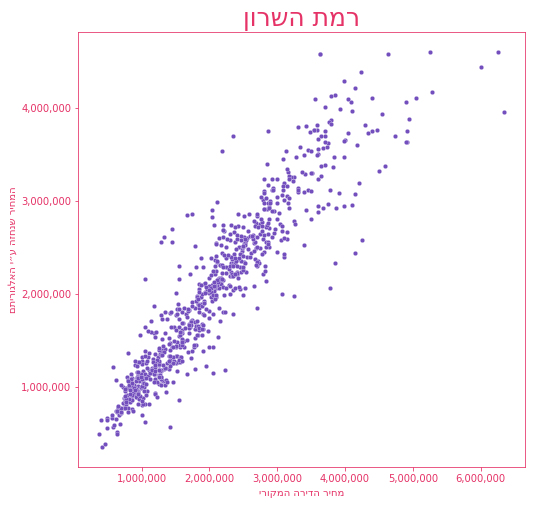

אור עקיבא
R2 Score: 0.8700
MSE sqrt: 152811.7866


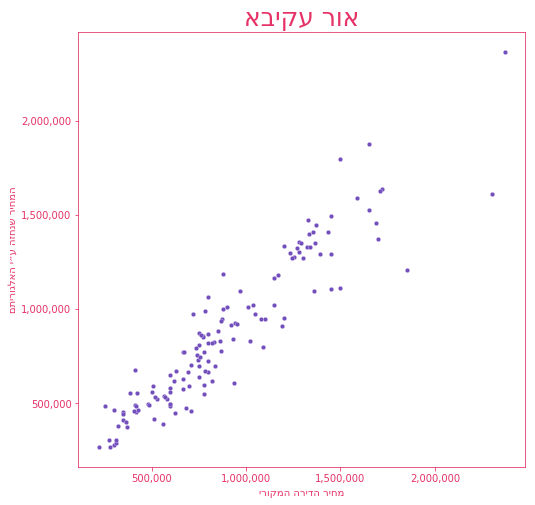

עפולה
R2 Score: 0.8474
MSE sqrt: 119655.6463


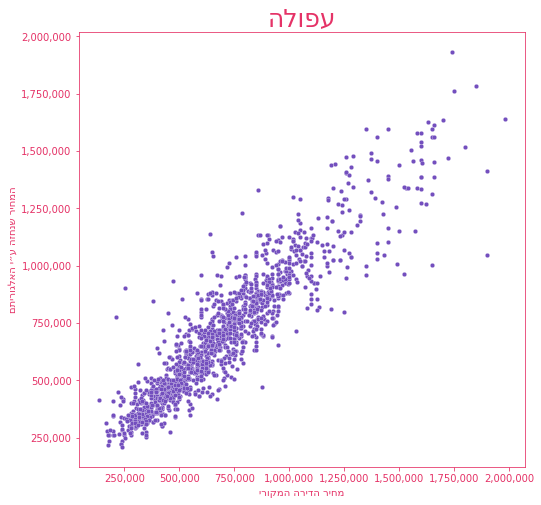

קרית גת
R2 Score: 0.8688
MSE sqrt: 119786.8925


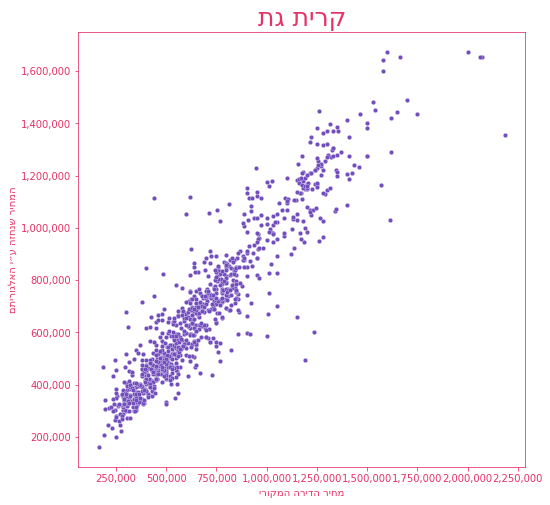

גבעתיים
R2 Score: 0.8744
MSE sqrt: 319241.8468


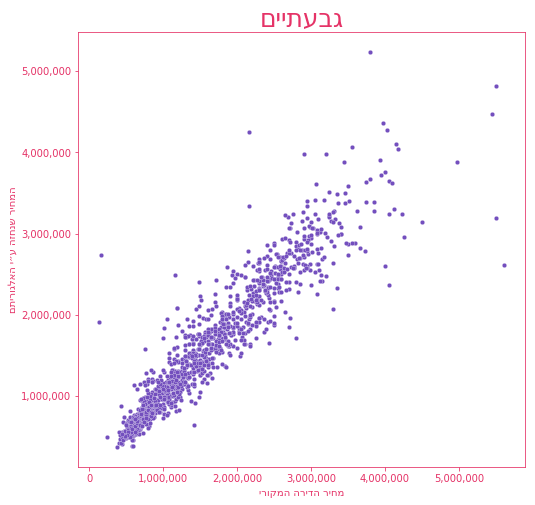

הוד השרון
R2 Score: 0.9096
MSE sqrt: 217130.8717


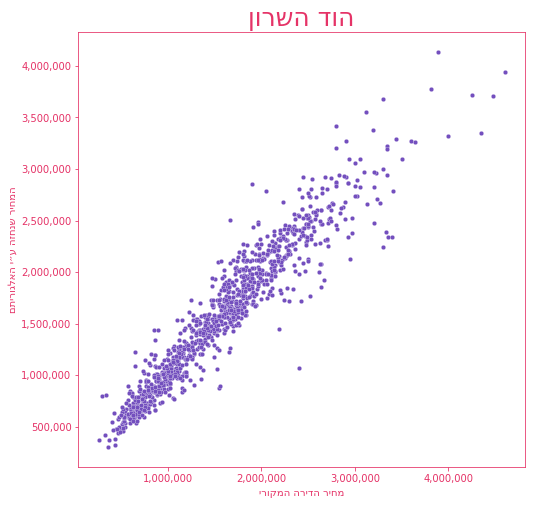

נתניה
R2 Score: 0.8895
MSE sqrt: 207362.9060


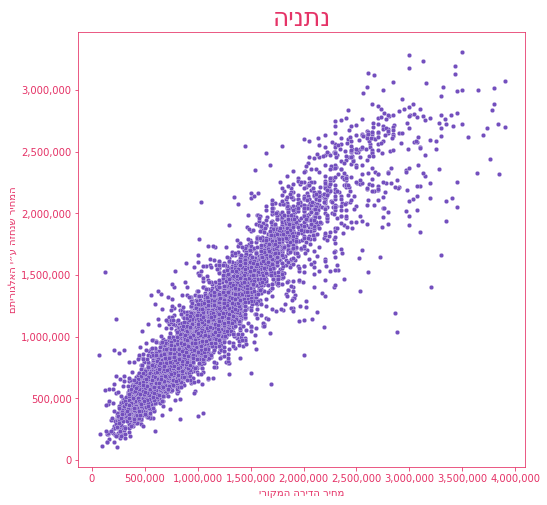

אשדוד
R2 Score: 0.8938
MSE sqrt: 173647.9593


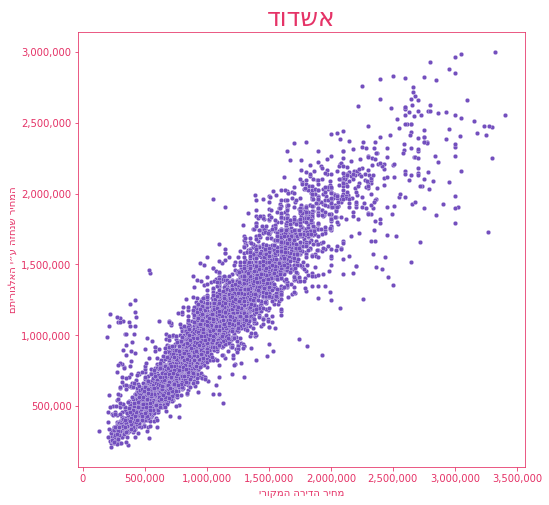

רעננה
R2 Score: 0.8452
MSE sqrt: 308180.3553


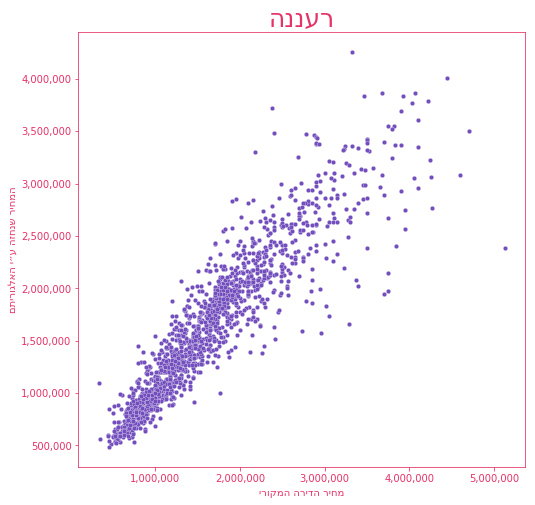

גבעת שמואל
R2 Score: 0.8397
MSE sqrt: 267631.7982


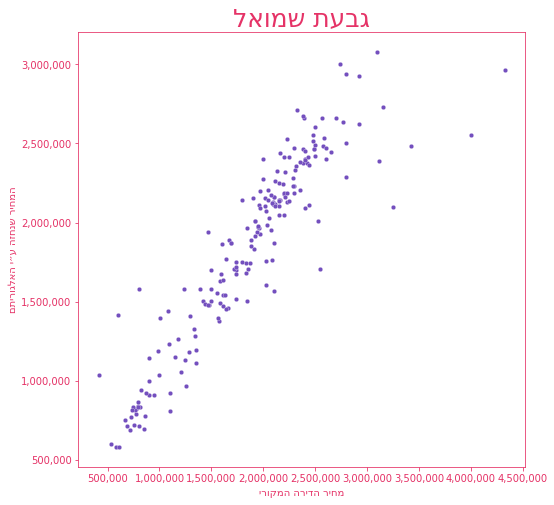

קרית אונו
R2 Score: 0.8977
MSE sqrt: 265169.0880


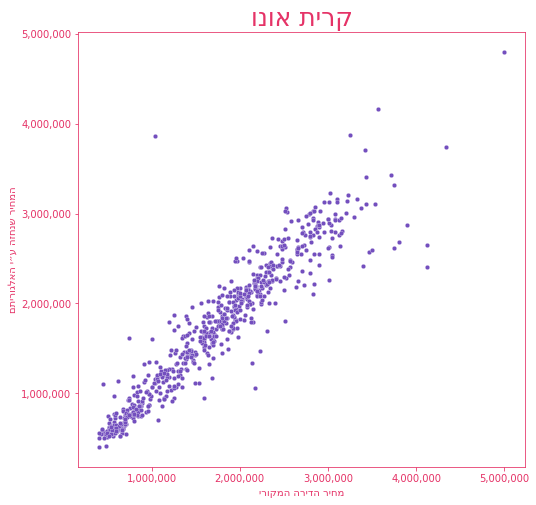

קרית שמונה
R2 Score: 0.6825
MSE sqrt: 108402.8647


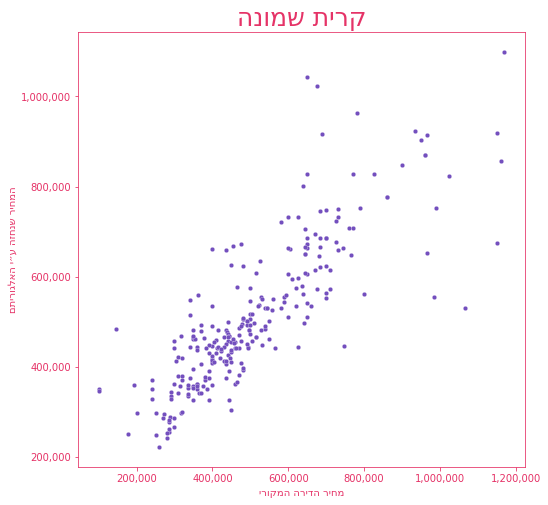

נס ציונה
R2 Score: 0.8566
MSE sqrt: 249681.5460


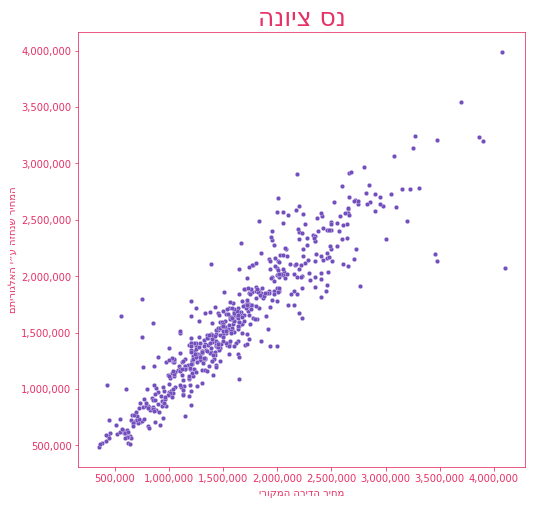

גני תקווה
R2 Score: 0.8984
MSE sqrt: 247838.0056


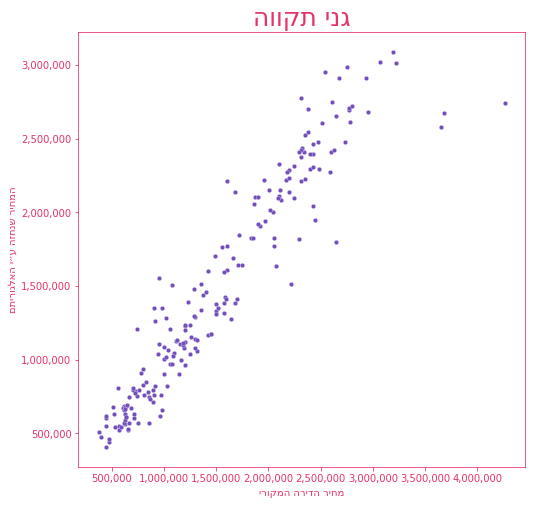

מבשרת ציון
R2 Score: 0.8430
MSE sqrt: 297448.6071


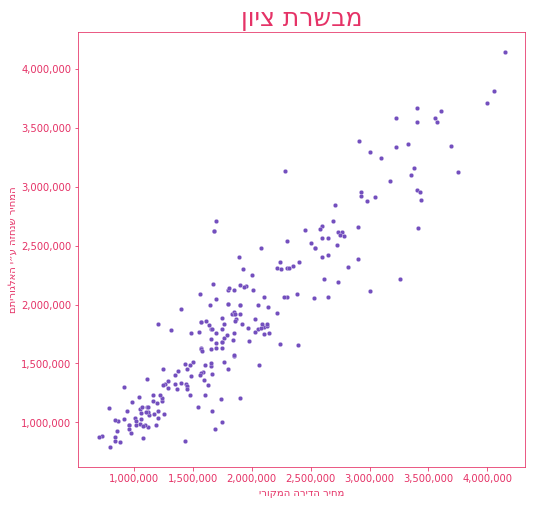

פתח תקווה
R2 Score: 0.9154
MSE sqrt: 166106.1492


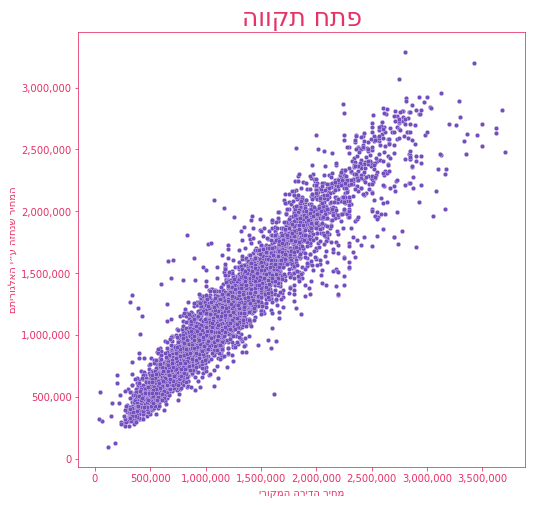

יהוד מונוסון
R2 Score: 0.8846
MSE sqrt: 202033.0021


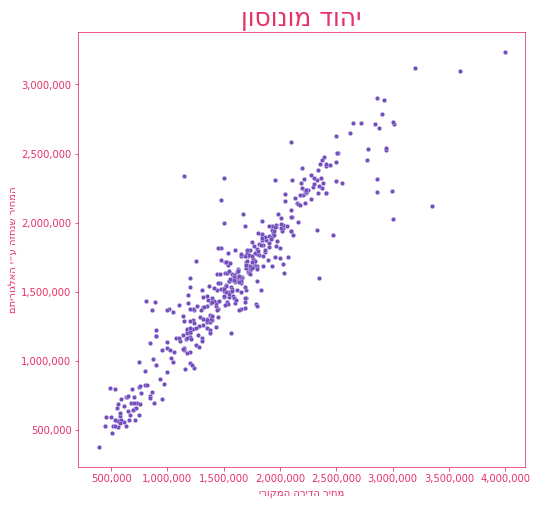

חולון
R2 Score: 0.9119
MSE sqrt: 165613.1306


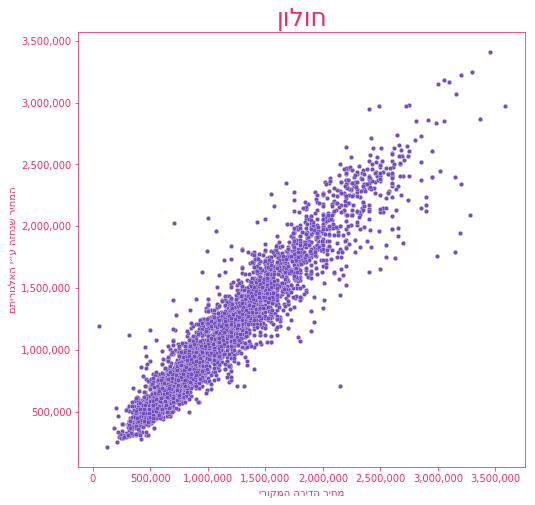

שוהם
R2 Score: 0.7824
MSE sqrt: 308207.5418


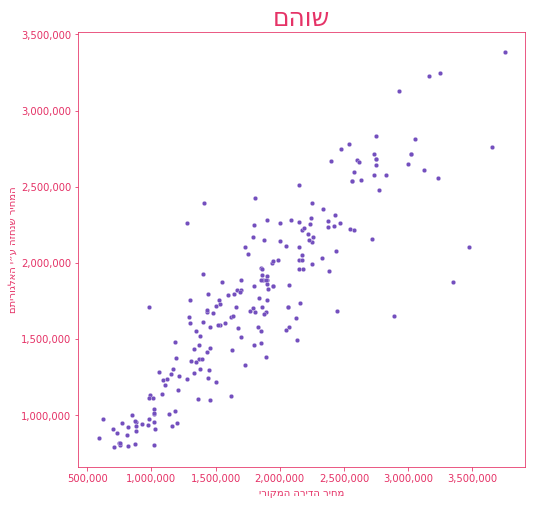

כפר סבא
R2 Score: 0.8746
MSE sqrt: 232981.8478


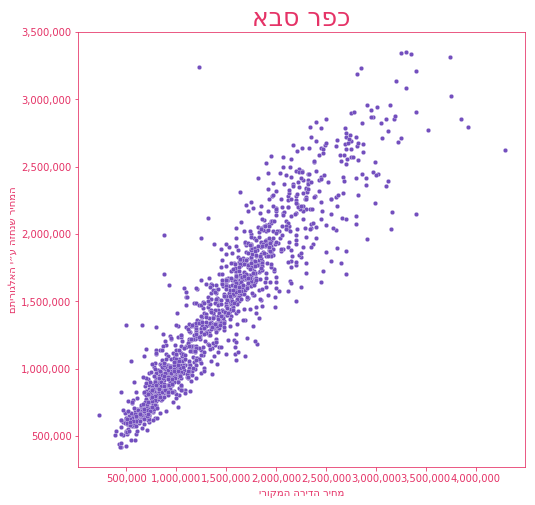

חדרה
R2 Score: 0.8797
MSE sqrt: 150124.3230


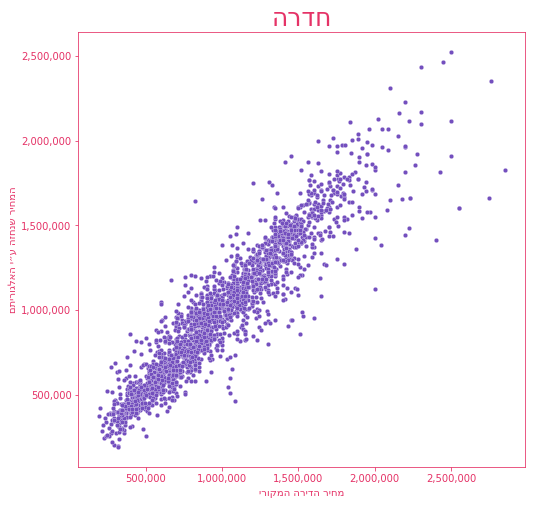

מודיעין מכבים רעות
R2 Score: 0.9020
MSE sqrt: 193928.0243


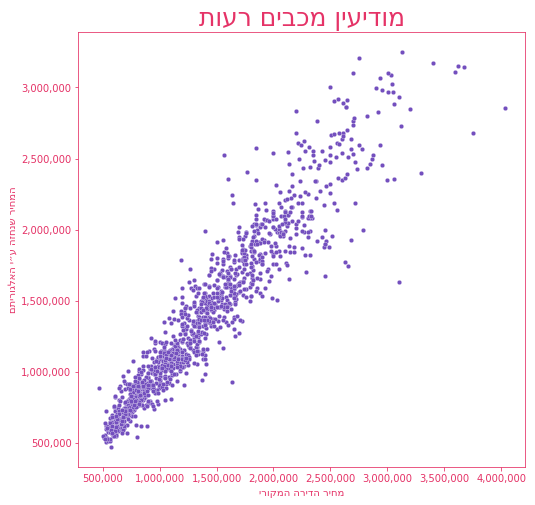

אזור
R2 Score: 0.8607
MSE sqrt: 238041.1636


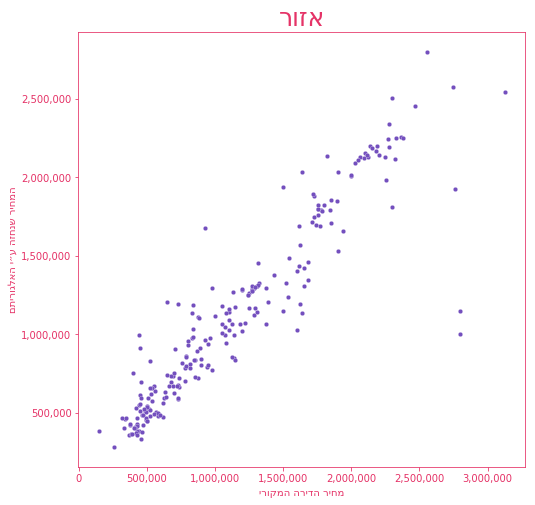

מזכרת בתיה
R2 Score: 0.9102
MSE sqrt: 206078.3895


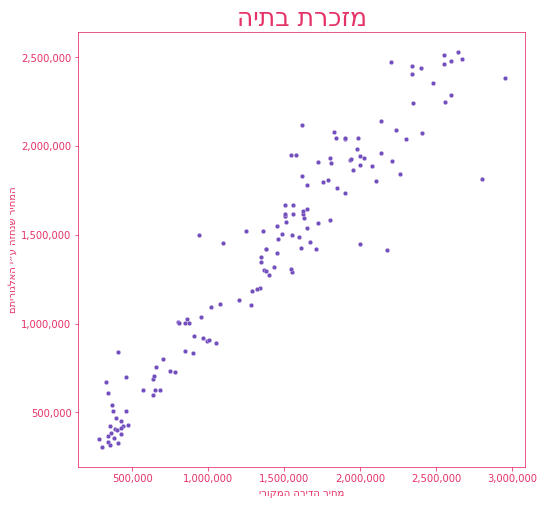

אילת
R2 Score: 0.8060
MSE sqrt: 172206.5412


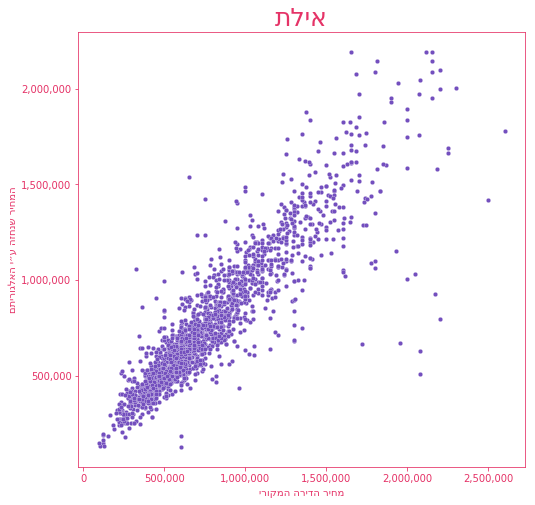

בני ברק
R2 Score: 0.8945
MSE sqrt: 153974.6758


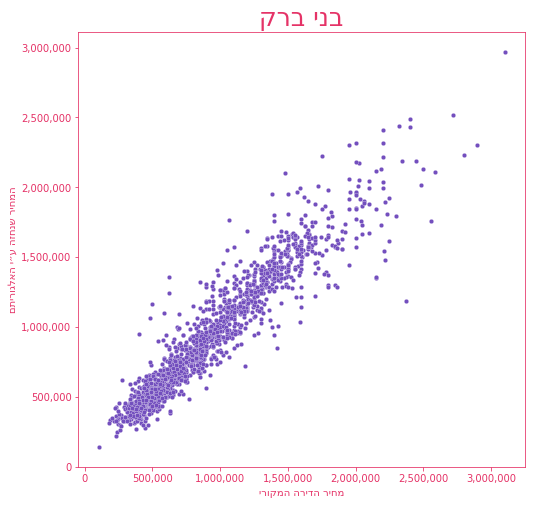

נהריה
R2 Score: 0.8605
MSE sqrt: 146368.2203


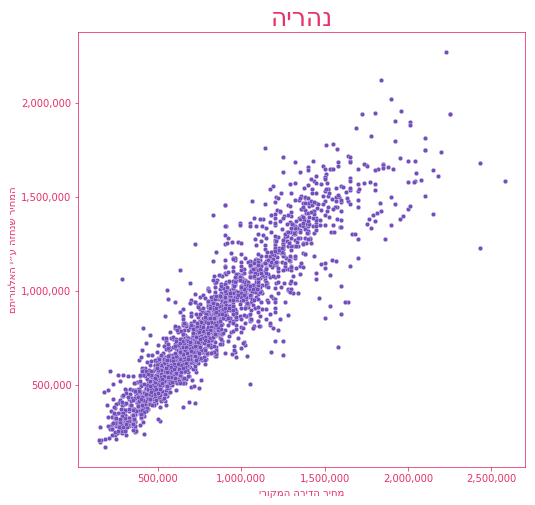

בית שמש
R2 Score: 0.8625
MSE sqrt: 159385.7017


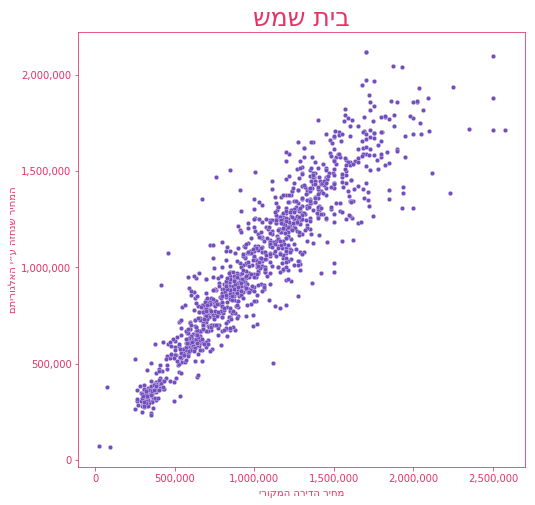

קרית ביאליק
R2 Score: 0.8326
MSE sqrt: 153384.9671


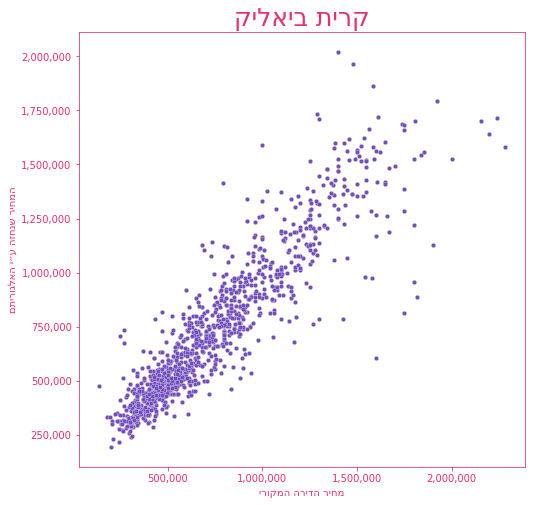

יבנה
R2 Score: 0.9005
MSE sqrt: 157285.9760


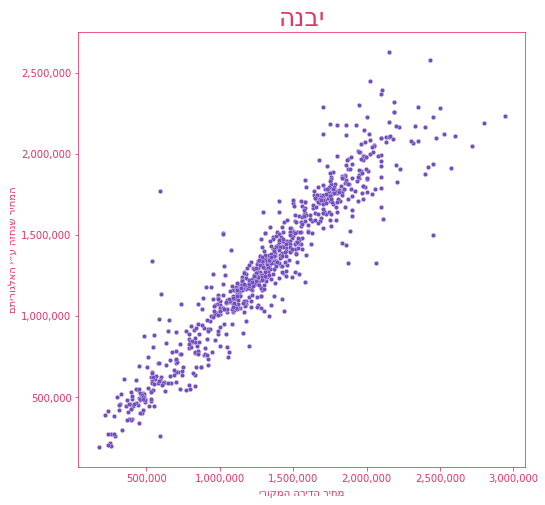

זכרון יעקב
R2 Score: 0.8054
MSE sqrt: 293066.7350


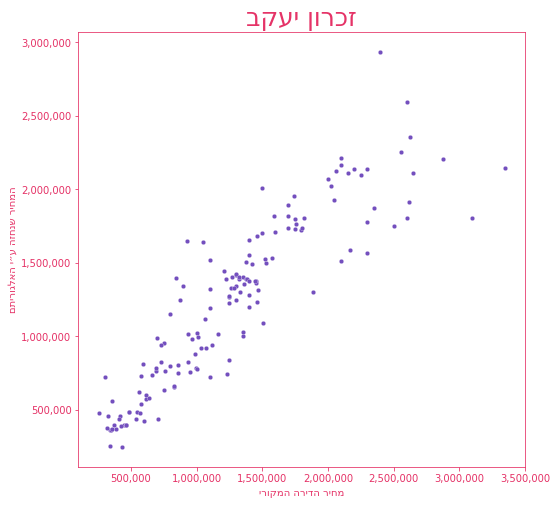

צור הדסה
R2 Score: 0.8613
MSE sqrt: 179952.7467


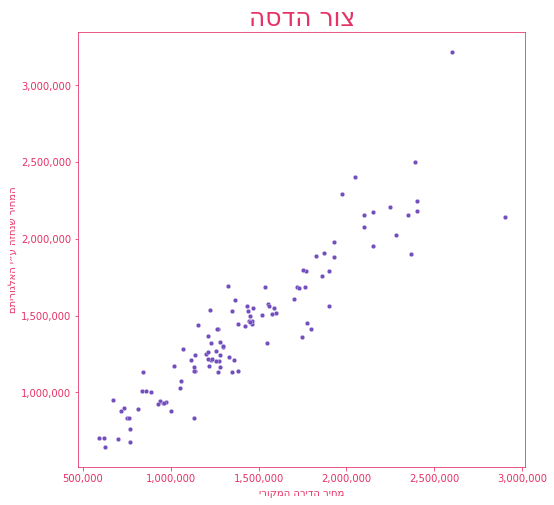

אשקלון
R2 Score: 0.8834
MSE sqrt: 130711.2621


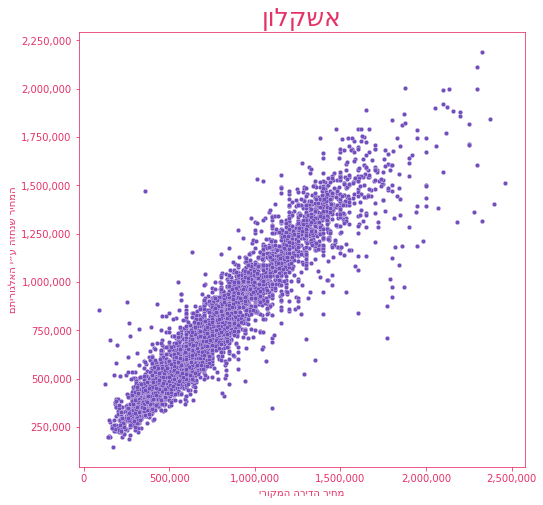

גן יבנה
R2 Score: 0.8384
MSE sqrt: 239384.3352


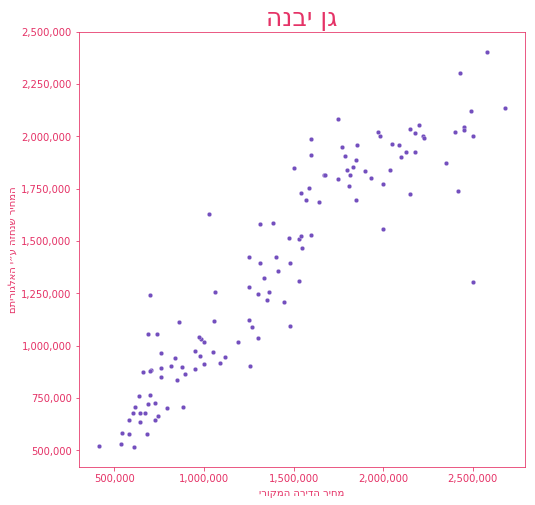

קרית מוצקין
R2 Score: 0.8866
MSE sqrt: 145767.3897


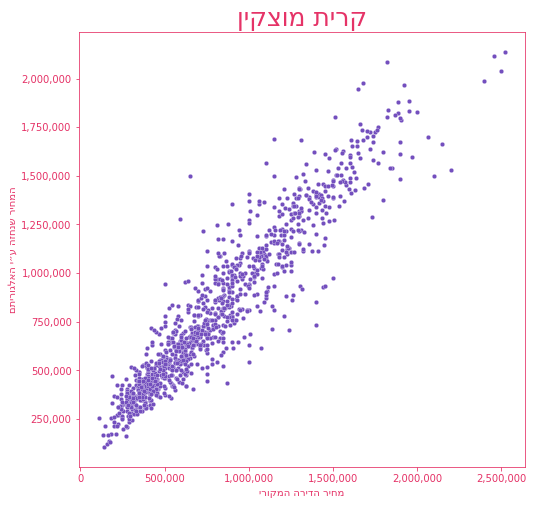

קרית אתא
R2 Score: 0.8778
MSE sqrt: 135929.2035


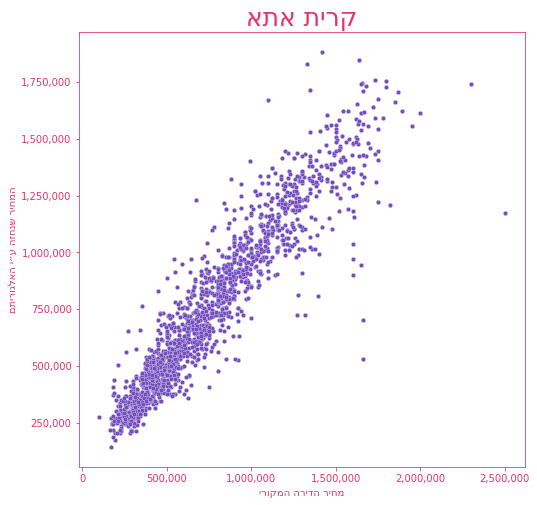

נצרת עילית
R2 Score: 0.7553
MSE sqrt: 164182.1119


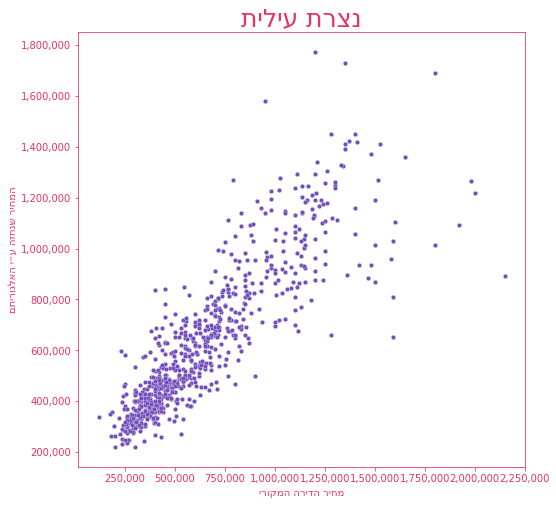

רמלה
R2 Score: 0.9159
MSE sqrt: 136119.8431


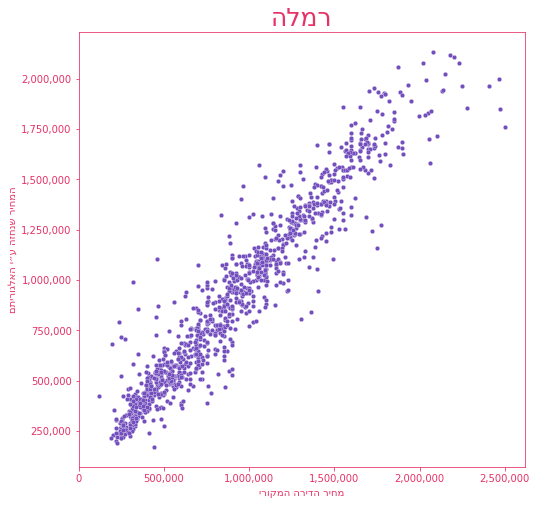

גדרה
R2 Score: 0.9124
MSE sqrt: 136792.7414


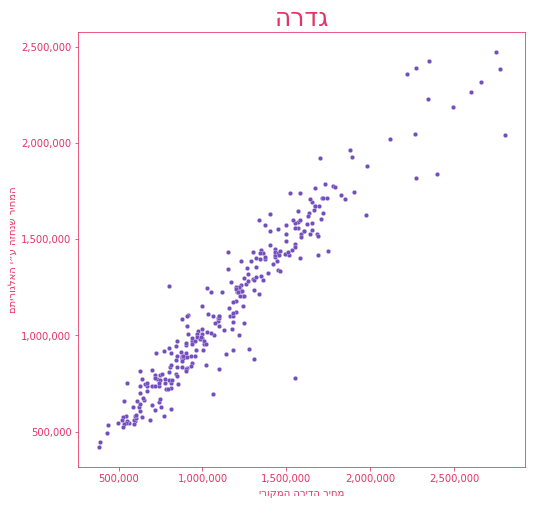

לוד
R2 Score: 0.8774
MSE sqrt: 119620.4684


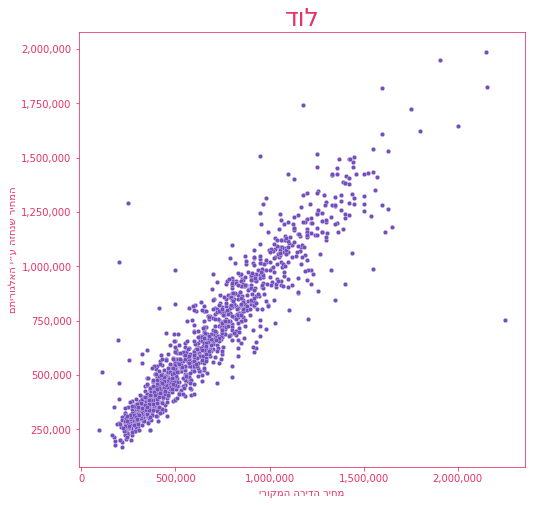

ראש העין
R2 Score: 0.8817
MSE sqrt: 156545.4048


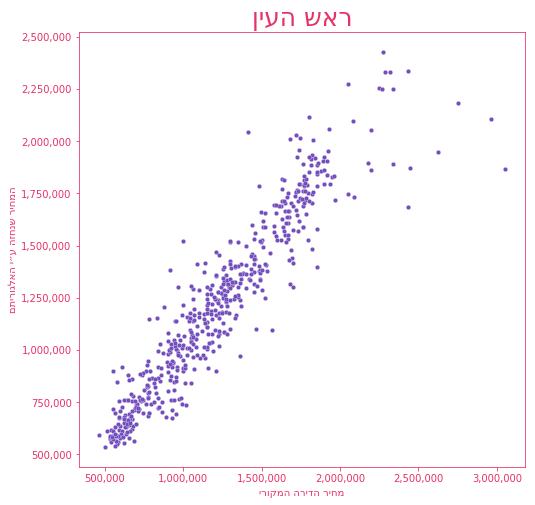

אור יהודה
R2 Score: 0.8765
MSE sqrt: 166510.8414


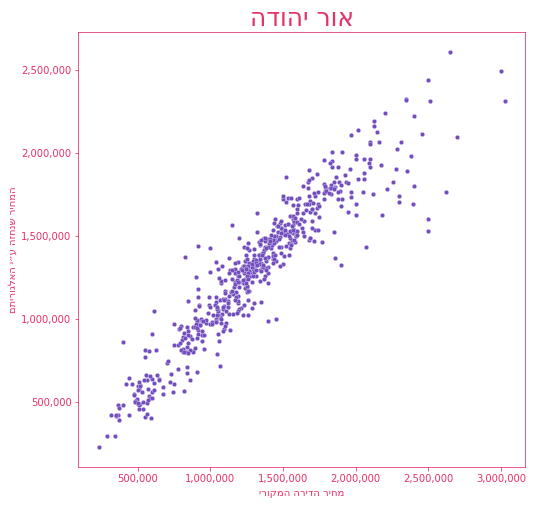

גבעת זאב
R2 Score: 0.8462
MSE sqrt: 205866.9573


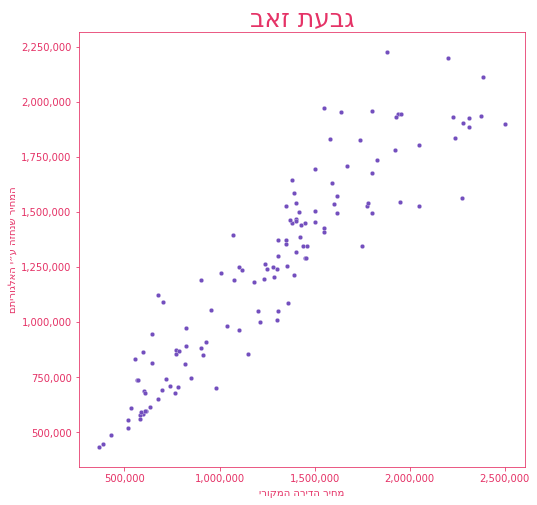

קדימה צורן
R2 Score: 0.8833
MSE sqrt: 203763.8461


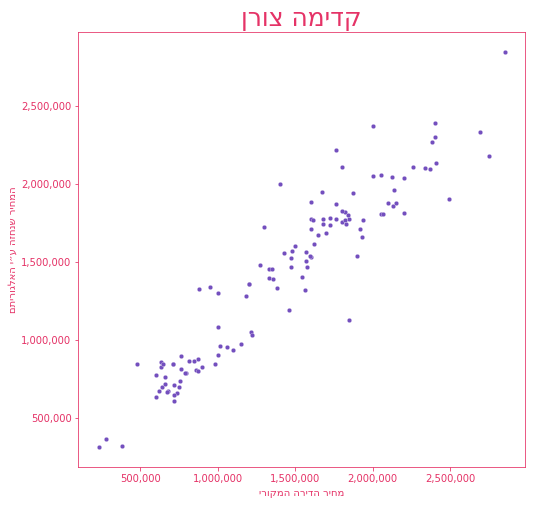

באר שבע
R2 Score: 0.8885
MSE sqrt: 110231.7286


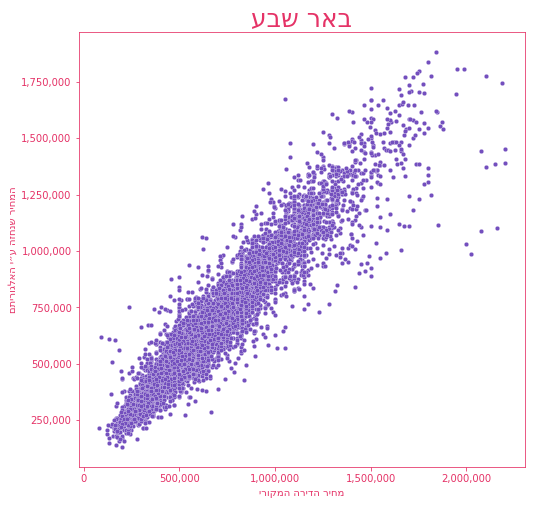

מעלה אדומים
R2 Score: 0.9219
MSE sqrt: 130758.7354


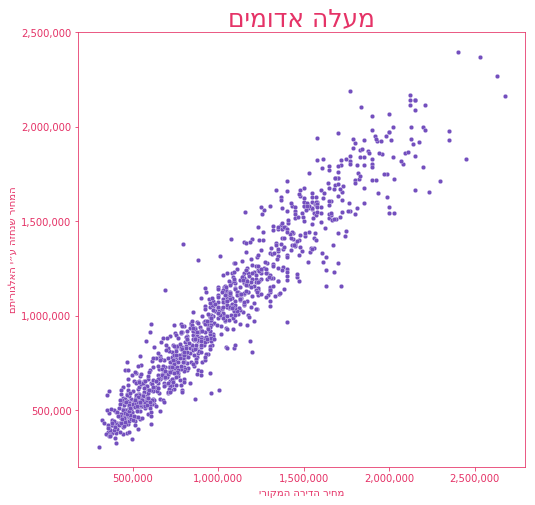

קרית מלאכי
R2 Score: 0.8853
MSE sqrt: 115689.0260


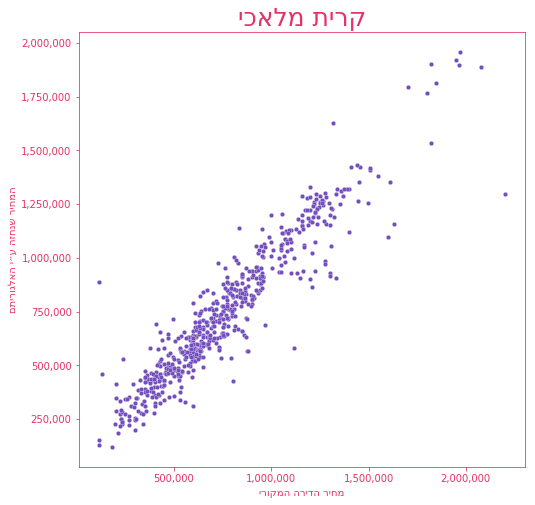

פרדס חנה כרכור
R2 Score: 0.8651
MSE sqrt: 184182.4841


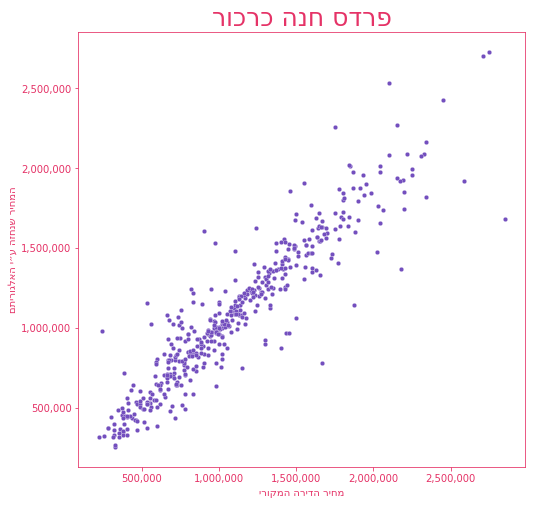

כפר יונה
R2 Score: 0.8684
MSE sqrt: 166586.6950


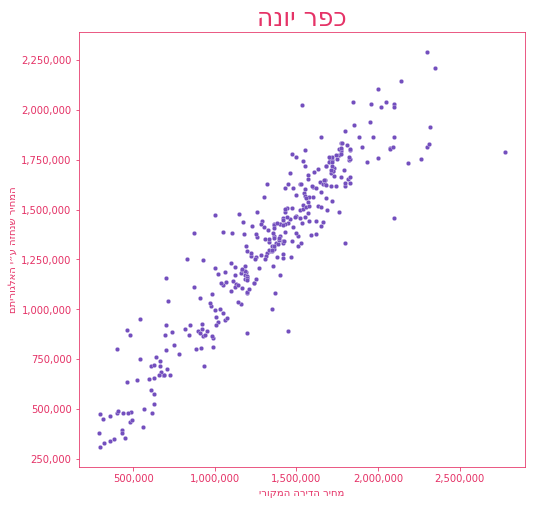

נשר
R2 Score: 0.8690
MSE sqrt: 125622.9519


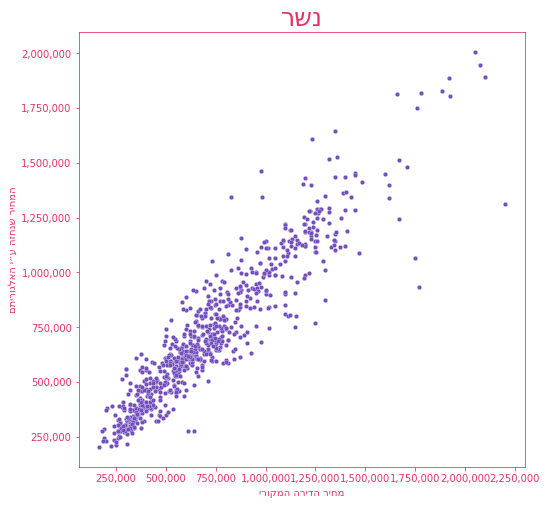

טבריה
R2 Score: 0.8054
MSE sqrt: 130364.3721


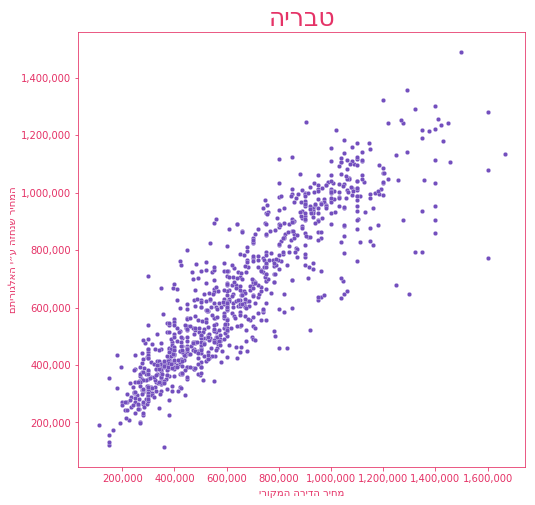

יקנעם עילית
R2 Score: 0.8427
MSE sqrt: 156576.6214


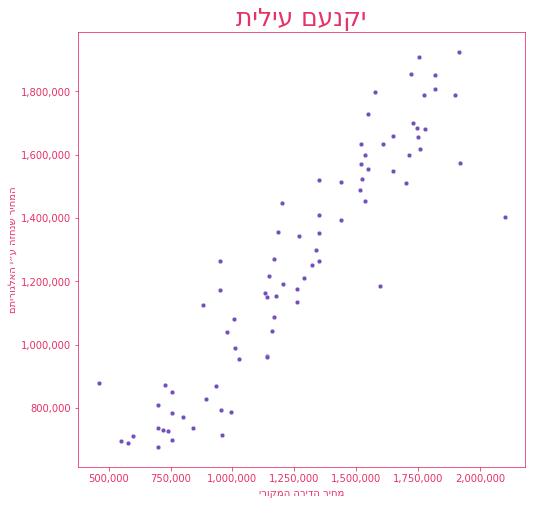

כרמיאל
R2 Score: 0.8605
MSE sqrt: 119605.4522


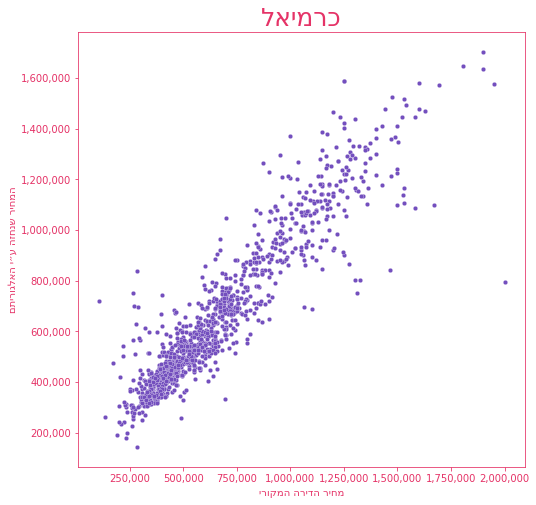

נתיבות
R2 Score: 0.7995
MSE sqrt: 123254.7458


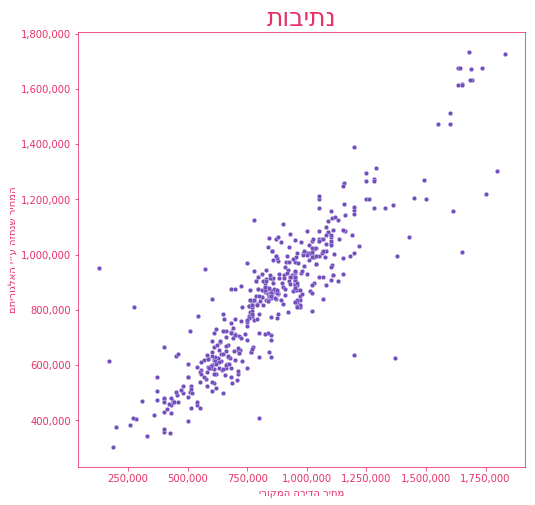

צפת
R2 Score: 0.7524
MSE sqrt: 135556.0104


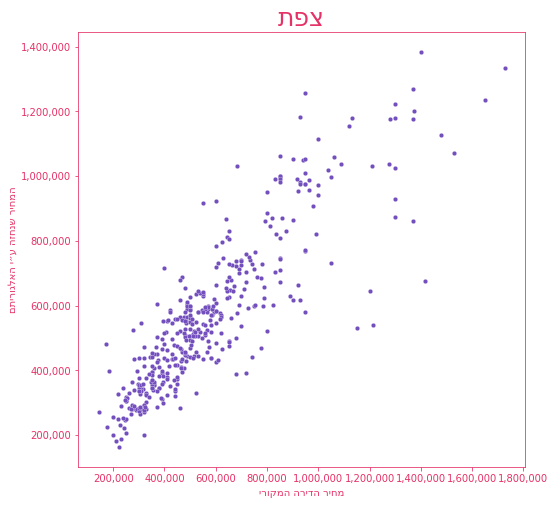

עכו
R2 Score: 0.8662
MSE sqrt: 121803.1119


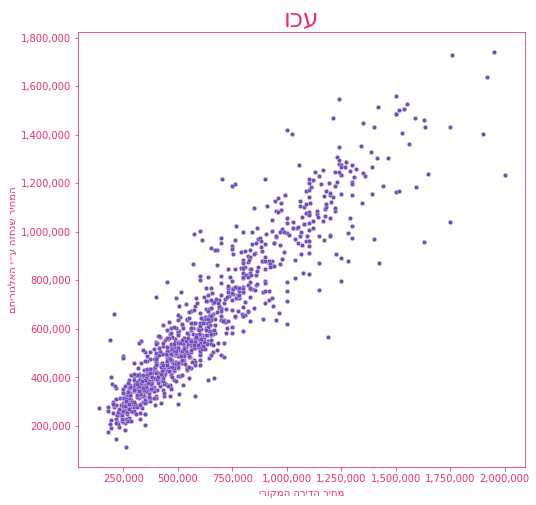

מודיעין עילית
R2 Score: 0.5910
MSE sqrt: 204459.3231


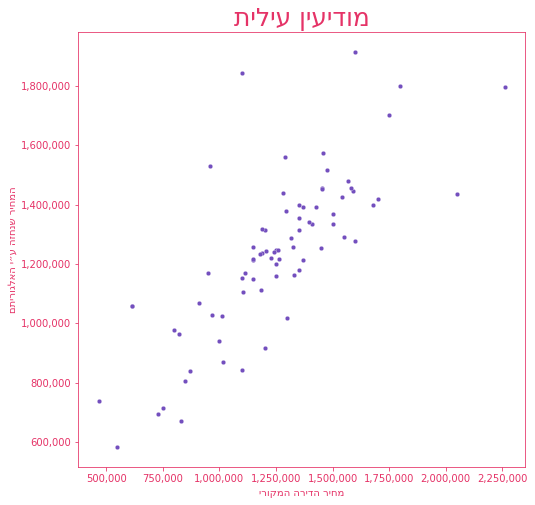

ביתר עילית
R2 Score: 0.8555
MSE sqrt: 161912.7091


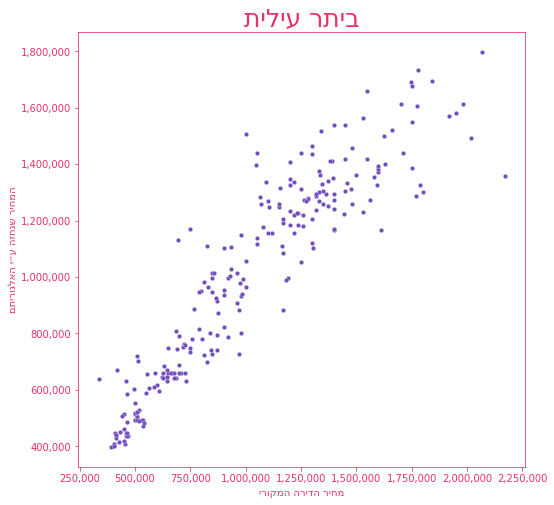

טירת כרמל
R2 Score: 0.8644
MSE sqrt: 151808.7037


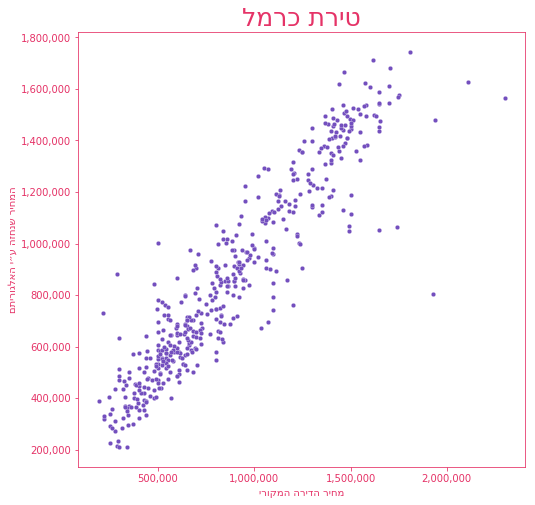

אריאל
R2 Score: 0.8862
MSE sqrt: 121416.4045


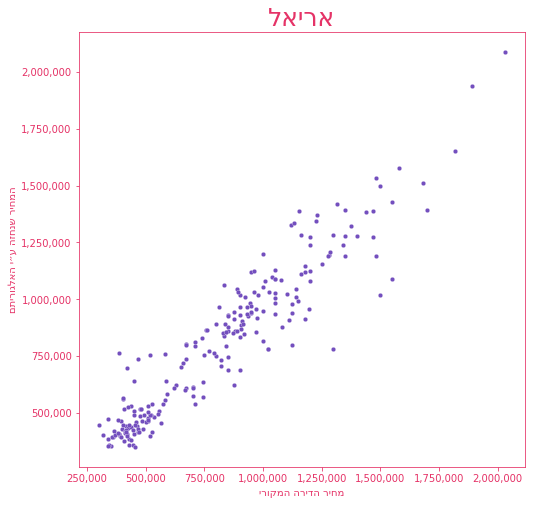

קרית ים
R2 Score: 0.8673
MSE sqrt: 116909.4324


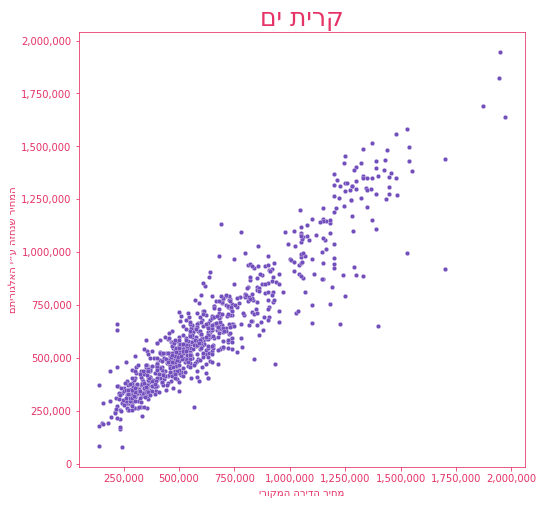

שדרות
R2 Score: 0.7244
MSE sqrt: 136449.0510


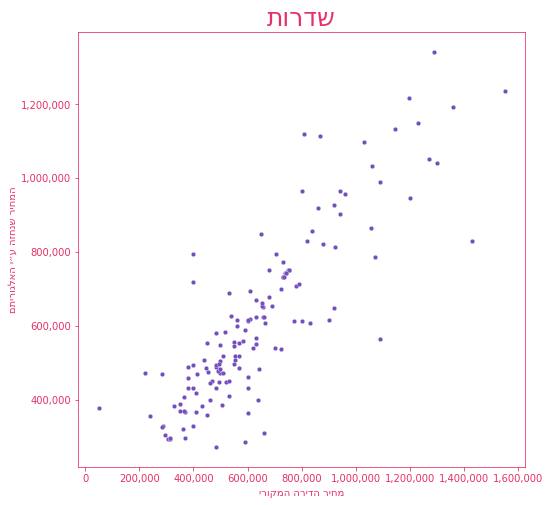

דימונה
R2 Score: 0.8469
MSE sqrt: 106437.0506


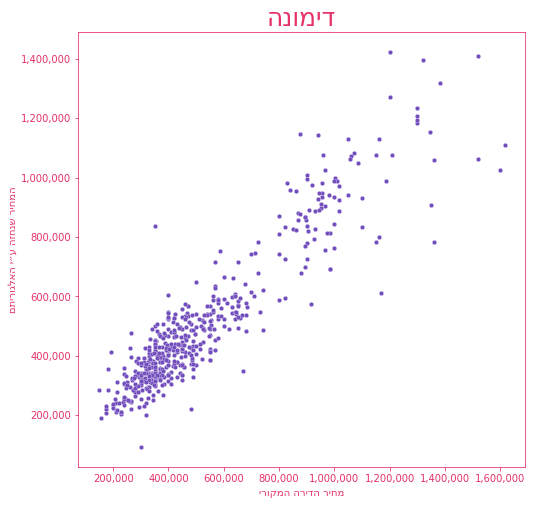

אופקים
R2 Score: 0.7997
MSE sqrt: 118297.4644


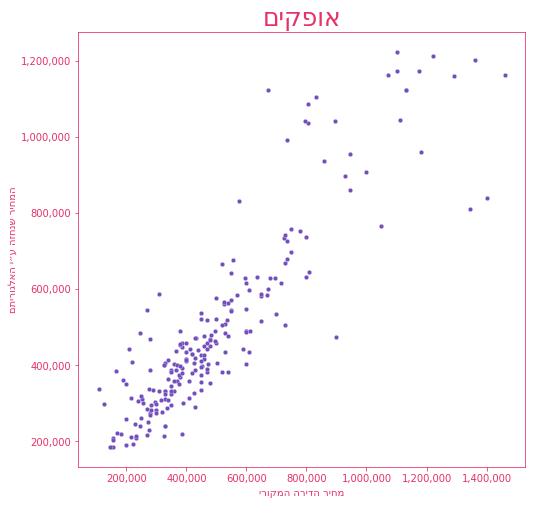

מעלות תרשיחא
R2 Score: 0.6810
MSE sqrt: 169680.1475


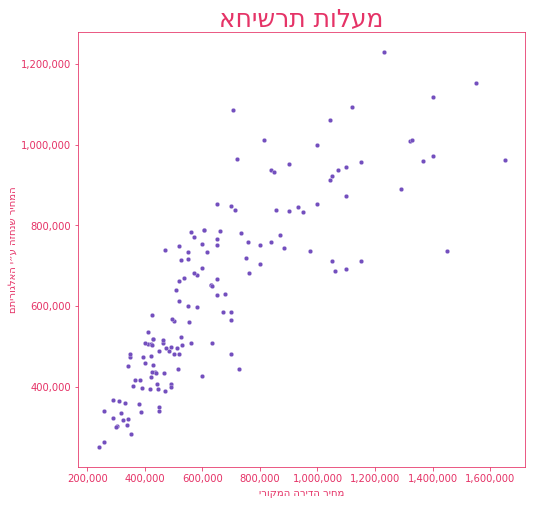

מגדל העמק
R2 Score: 0.8199
MSE sqrt: 117534.1931


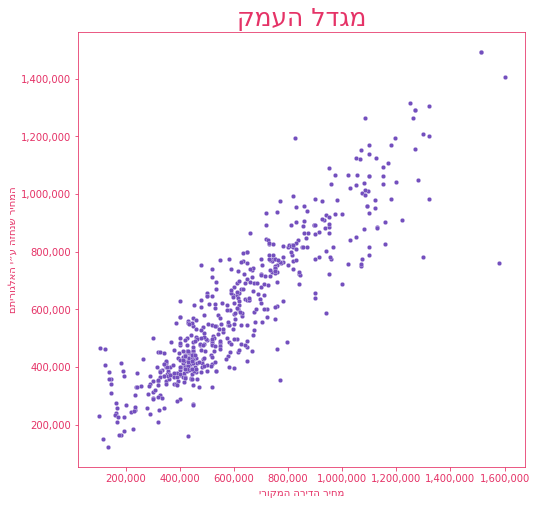

בית שאן
R2 Score: 0.7939
MSE sqrt: 103022.8539


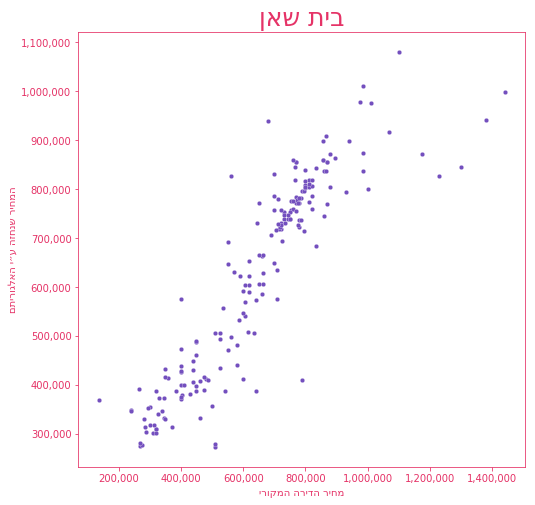

ערד
R2 Score: 0.8526
MSE sqrt: 89625.6539


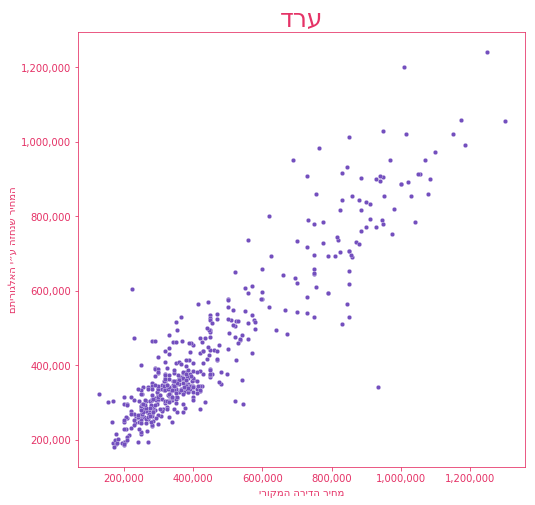

קצרין
R2 Score: 0.7648
MSE sqrt: 127528.0182


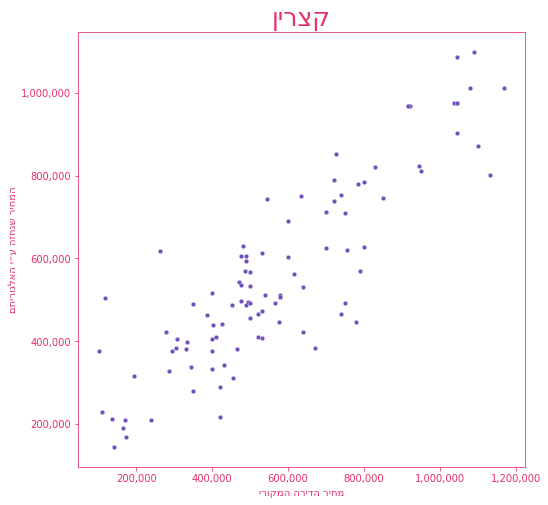

In [7]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    # get the rows of the city
    _df = df.loc[(df['city'] == city)]
    # removing outliers by 'final_price' column
    _df = remove_outlier(_df, 'final_price')
    print(city)

    X = _df[used_features]
    y = _df['final_price']

    # Preprocessing X columns by OneHotEncoder
    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    # saving processor algo for future use
    cities[city]["processor"] = ohe
    
    # split the date into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)

    # initiate the Algo
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    # fitting the algo with train set
    clf.fit(X_train, y_train)
    # saving the algo for future prediction
    cities[city]["algo"] = clf
    
#     print(clf.feature_importances_)
    # Get Algo score and MSE values
    y_pred = clf.predict(X_test)
    print("R2 Score: %.4f" % clf.score(X_test, y_test))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    cities[city]["mse"] = sqrt(mse)
    print("MSE sqrt: %.4f" % sqrt(mse))
    
    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, s=20, edgecolor="white", linewidth='0.25', c="#734fbe", label="data")
    ax = plt.axes()
    plt.xlabel(bidialg.get_display('מחיר הדירה המקורי'), fontsize=10)
    plt.ylabel(bidialg.get_display('המחיר שנחזה ע״י האלגוריתם'), fontsize=10)
    plt.title(bidialg.get_display(city), fontsize=25)

    # format axes numbers to be with delimiter (e.g. 1000000 -> 1,000,000)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Change plot axes colors
    sub_color = '#e53367'
    ax.spines['bottom'].set_color(sub_color)
    ax.spines['top'].set_color(sub_color) 
    ax.spines['right'].set_color(sub_color)
    ax.spines['left'].set_color(sub_color)
    # Use the following to change only the ticks:
    ax.tick_params(axis='x', colors=sub_color)
    ax.tick_params(axis='y', colors=sub_color)
    # And the following to change only the label:
    ax.yaxis.label.set_color(sub_color)
    ax.xaxis.label.set_color(sub_color)
    # And finally the title:
    ax.title.set_color(sub_color)

    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    # Save plot figure
    plt.savefig(os.path.join(folder, "algo_fig.png"), format='png', dpi=300)
    plt.show()


## Testing If Prediction is working

In [8]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4.0, 4.0, 4.0, 4.0, 4.0], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': [2015, 2019, 2010, 2017, 2019],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
    'sale_day_year': [2019, 2019, 2019, 2019, 2019]
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות           4.0      2        2015   
1     יצחק רגר     שכונה ב'  דירת בבית קומות           4.0     10        2019   
2    משה פריבס    רמות הרכס  דירת בבית קומות           4.0      2        2010   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות           4.0      2        2017   
4       התקווה   מרכז אזרחי  דירת בבית קומות           4.0      2        2019   

   building_mr     city  sale_day_year  
0          115  באר שבע           2019  
1          116  באר שבע           2019  
2          120  באר שבע           2019  
3          120  באר שבע           2019  
4          113  באר שבע           2019  
[1111873.9219510488, 1065106.0788700806, 1050985.78313879, 1053818.9720818466, 1331405.7236978663]


## Dumping Algo

In [9]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

    with open(os.path.join(folder, "algo_mse.txt"), 'w') as fig:
        fig.write(str(values["mse"]))
